<a href="https://colab.research.google.com/github/mariacmartins/shepy/blob/main/Aula_7_Regress%C3%A3o_Linear_shePY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear
### Aula ministrada por Frederico Kremer

O resultado de uma regressão linear é uma equação de reta que minimiza alguma função de erro, como a **soma do erro quadrático** (*sum of squared error*, SSE) e a **raiz quadrática média** (*root mean square error*, RMSE).

$y = b + a * x$

A **soma do erro quadrático** é definido pela seguinte equação:

$SSE = \Sigma_{i=1}^{n}{\Big(y^{pred}_i - y_i\Big)^2}$


A **raiz quadrática média do erro** é calculada com a seguinte equação:

$RMSE = \sqrt{\frac{\Sigma_{i=1}^{n}{\Big(y^{pred}_i - y_i\Big)^2}}{n}}$

A identificação dos melhores valores de $b$ e $a$ é um problema de otimização clássico, e diferentes estratégias podem ser utilizadas para isso. Uma abordagem simples para este problema é a de **mínimos quadrados ordinários** (*ordinary least squares*), muito utilizada em estatística clássica. Este método exige que exista uma distribuição normal nos dados e ausência de co-linearidade. O ajuste dos parâmetros é feito com base na **derivada parcial do erro** de forma **não-iterativa**.

![](https://cnx.org/resources/33dd2f2308d09aa6422b056cdf466692a1351722)

Outra abordagens é denominada **descida de gradiente** (*gradient descent*), que consiste em um processo **iterativo** de otimização dos valores a partir da **derivada parcial do erro**. 

![](http://cdn-images-1.medium.com/max/640/1*eeIvlwkMNG1wSmj3FR6M2g.gif)

Para entender isso, imagine que nós estamos tentando ajustar $a$ e $b$ gradualmente, com pequenos **passos** (*steps*), onde iremos aumentar ou diminuir estes parâmetros de acordo de forma proporcional ao impacto que estes tem no erro. Desta forma, os ajustes são proporcionais ao erro e ponderados por um valor chamado **taxa de aprendizagem** (*learning rate*), geralmente abreviado pela letra grega $\alpha$.

![](https://miro.medium.com/max/600/1*iNPHcCxIvcm7RwkRaMTx1g.jpeg)

Esta abordagem de otimização é também utilizada por outros modelos de aprendizado de máquina, com as **redes neurais**, onde há não-linearidade e co-linearidade.

![]()

## Exemplo de regressão univariada

A forma mais simples de regressão e a univariada, quando há apenas uma **variável explicativa** e uma **variável de desfecho**. No contexto de aprendizado de máquina é comum se utilizar os termos **atributo** (*feature*) e **rótulo** (*labels*) para se referir, respectivamente, às mesmas coisas. 

In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

In [ ]:
data = load_diabetes()

In [ ]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']

In [ ]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


In [ ]:
X = df[['bmi']]
y = df['target']

In [ ]:
from matplotlib import pyplot as plt

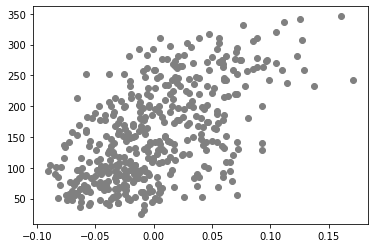

In [ ]:
plt.scatter(X, y, color='gray')

In [ ]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.coef_

array([949.43526038])

In [ ]:
model.intercept_

152.1334841628967

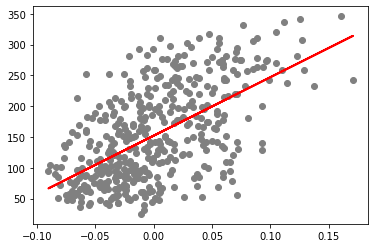

In [ ]:
y_pred = model.predict(X)

plt.scatter(X, y, color='gray')
plt.plot(X, y_pred, color='red', linewidth=2)

## Exemplo de regressão multivariada

Para uma regressão multivariada, com $i$ variáveis, $x$ vetor que armazenará multiplos valores, e $a$ será um vetor de pesos. Por conta disso, a equação da reta será resultado da soma ponderada dos valores de $x$ pelos pesos $a$, acrescentando-se posteriormente o $b$.

$y = b + (\sum_{i=1}^n{a_i x_i})$

Em estatística, as **variáveis explicativas** de um modelo multivariado são também denomiandos **variáveis independentes**, visto que devem ser independentes entre si, mas dependentes da **desfecho**. Quando isso não ocorre, dizemos que o modelo possui **co-linearidade**, e isso pode ser um problema em alguns casos *.

*Obs:* mas geralmente estatísticos se preocupam mais com isso que engenheiros de *machine learning*.

### Duas variáveis

In [ ]:
X = df[['bmi', 'age']]

In [ ]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.coef_

array([924.81645876, 133.01372901])

In [ ]:
model.intercept_

152.13348416289674

## Todas as variáveis

In [ ]:
X = df.drop(['target'], axis=1)

In [ ]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [ ]:
model.intercept_

152.1334841628965

## Métricas para avaliar modelos de regressão

Diferentes métricas podem ser utilizadas para a avaliação de modelos de regressão, sendo algumas destas utilizadas inclusive como função de erro (ex: RMSE). Além disso, é possivel também se utilizar métricas de estatística, como a de Pearson e de Spearman para analisar a correção entre o valor previsto e real da variável de interesse, ou o coeficiente de determinação.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [ ]:
y_pred = model.predict(X)

In [ ]:
mean_squared_error(y, y_pred)

2859.6903987680657

In [ ]:
mean_absolute_error(y, y_pred)

43.27739508374988

In [ ]:
r2_score(y, y_pred)

0.5177494254132934

In [ ]:
pearsonr(y, y_pred)

(0.7195480702588907, 1.101545724797191e-71)

In [ ]:
spearmanr(y, y_pred)

SpearmanrResult(correlation=0.7050483982989378, pvalue=1.1428861440056012e-67)

## Evitar "overfitting"

Quando treinamos um modelo de aprendizado de máquina, esperamos que ele seja capaz de "generalizar", ou seja, extrapolar o seu aprendizado para dados diferentes dos apresentados para o seu treinamento (**conjunto de treino**). Uma das formas de verificarmos a generalização e avaliando a performance do modelo para dados nunca vistos antes, ou seja, dados que não foram utilizados para o seu treinamento, sendo então denominados **conjunto de teste**.

Um modelo é chamado *overfitted* (**sobreajustado**) quando seus parâmetros se comportam bem para os dados de treino mas mal para os dados de teste. Em algumas situações é possível que o modelo se comporte mal para ambos, sendo então denominado *underfitted* (**sub-ajustado**). Ambos os cenários são ruins.

O *underfitting* pode ser resolvindo com a utilização de modelos mais complexos, capazes de capturar mais características dos dados (ex: não-linearidades), enquanto que o *overfitting* pode ser resolvido com a utilização de modelos mais simples e/ou **regularização** (ex: penalizar, durante o treinamento, os modelos que apresentem pesos com valores muito altos). Existem diferentes tipos de regularização, sendo L1 e L2 algumas das mais utilizadas em modelos lineares.

![](https://miro.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred)

3204.1401485152664

In [ ]:
mean_absolute_error(y_test, y_pred)

47.45501981326595

In [ ]:
r2_score(y_test, y_pred)

0.4641101539485756

In [ ]:
pearsonr(y_test, y_pred)

(0.6957357817078483, 2.3599558091561977e-17)

In [ ]:
spearmanr(y_test, y_pred)

SpearmanrResult(correlation=0.6613589356355982, pvalue=2.7730958066640248e-15)

## Cuidados na criação de modelos lineares

- As variáveis usadas como *features* ($x$) sejam independentes entre si, ou seja, que exista pouca co-linearidade entre elas.

- A distribuição dos dados é linear ou se há interações não-lineares (isso pode ser visto na análise exploratória).

- Não devem haver *outliers* (isso também pode ser visto na análise exploratória). É possivel se reduzir o efeito de *outliers* com o uso de métodos de regularização.

- A distribuição dos dados deve ser normal.

- Não extrapole (muito) além dos limites de dados que foram utilizados para o treino do modelo. 

![](https://imgs.xkcd.com/comics/extrapolating.png)
